In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Load the Dataset

Load the dataset from "./diabetes.csv" using pandas read_csv method.
The dataset is available at [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [42]:
df = pd.read_csv("diabetes.csv", sep=",", header=0)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic info about the data

First, let's use the `pandas` library to read our data and get some basic information about it.

Check all the columns
Here, our outcome is the binary variable Outcome, which indicates whether 
the patient has diabetes or not.

In [43]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Get to relation between the Age and outcome

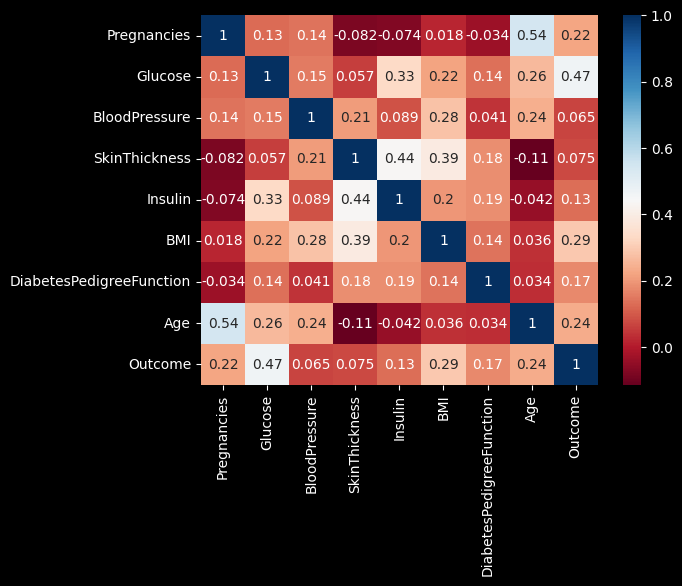

In [37]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')
plt.show()

So, we can come to some conclusions from the heat map above.
For one, the correlation between the columns is not too high. This means that we cannot drop any columns from the dataset.

Next, glucose and insulin have the highest correlation with the outcome variable. This means that these two features are the most important features when it comes to predicting the outcome.

Age too has a decent correlation with the outcome variable. This means that the age of a person plays a role in predicting the outcome.

The Diabetes pedigree function on the other hand, which is scientific way of measuring how likely you are to get diabetes based on your ancestors has less correlation with the outcome variable. 

And I would like to point out a funny thing, the skin thickness and age have a negative correlation.

## Some more digging with matplotlib

We try and dig a little more into the data using matplotlib. We plot the distribution of the data for each feature.

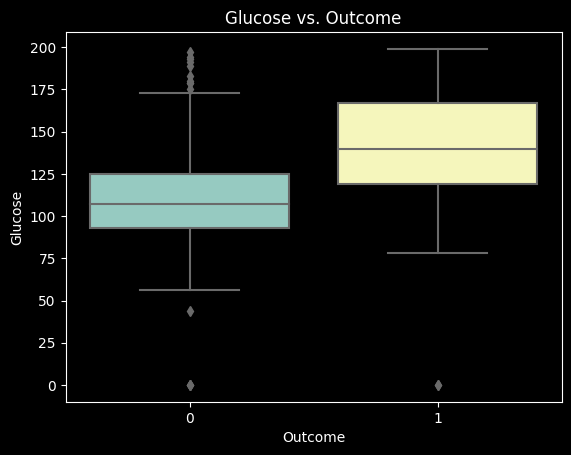

In [82]:
# For all features
# for feature in df.columns[:-1]:
#     plt.figure()
#     sns.boxplot(x='Outcome', y=feature, data=df)
#     plt.title(f'{feature} vs. Outcome')
#     plt.show()
plt.figure()
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs. Outcome')
plt.show()

Finally, split the data into outcome and features column

In [46]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

Variability of the data seems to be high, but let's check anyways 
if what the variability is in the data.

In [48]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])

scaled_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Check the standard deviation now

In [52]:
print(df.std())
print(scaled_df.std())

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64
Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
dtype: float64


Also, redefine the X and y to the scaled data

In [70]:
X = scaled_df.values
y = df['Outcome'].values

So, as you can see, we systematically normalize the data. We also use a 80/20 split for the training and test sets. We use the same seed for the random number generator to ensure that the results are reproducible.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we are ready to dive into the heart of the model that decided the whole thing.

Now, since this is a classification problem, we can either use Logistic Regression or Random Forest Classifier. I have used both and found that Random Forest Classifier gives better results. So, I will be using Random Forest Classifier.

In [73]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

In [74]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
y_pred = rf_classifier.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.73%


In [158]:
logistic_classifier = LogisticRegression(random_state=42, max_iter=2000)

In [159]:
logistic_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [160]:
y_pred = logistic_classifier.predict(X_test)

In [161]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.32%


So, a random forest classifier gave us an accuracy of 0.75. This is not bad, but we can do better. Let's try a different model.

A different model can be a neural network. Neural networks are very powerful and can be used for classification and regression. We will use a neural network for classification. We will use the same data as before.

However, before we can do that, we need some basic stats about our data. We need to know how many features we have and how many classes we have. We also need to know how many samples we have. We can do this by using the shape attribute of the data frame.

In [88]:
len(scaled_df.columns)

scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


So, now we can get started with building our model

In [148]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [149]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

In [153]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.8214 - accuracy: 0.7143
Test Accuracy: 0.7142857313156128


So, after doing all of this, the age old law comes into play: "If you can do it without a neural network, do it"

We will be proceeding with the logistic regression model.
Since it is the most accurate model for this dataset.

## Final Results

- Logistic Regression: 0.77
- Random Forest: 0.74
- Neural Network: 0.72

## Next Steps

We will be proceeding with logistic regression as the final model and plotting a small dashboard to show the results.

In [171]:
final_model = LogisticRegression(random_state=42, C=0.1, penalty='l2', solver='liblinear')

In [172]:
final_model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [173]:
y_pred = final_model.predict(X_test)

In [174]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.97%


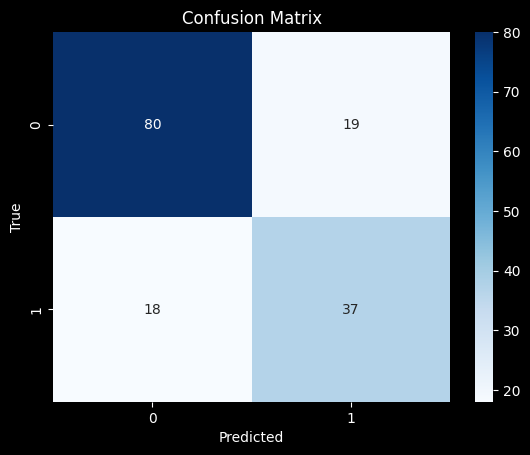

In [175]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Saving the model

We will be using the `joblib` library to save our model. This library allows us to save our model as a file and load it later on.

In [176]:
import joblib

In [182]:
joblib.dump([final_model, accuracy, scaler], 'model.pkl')

['model.pkl']

## Try loading the model

In [183]:
final_model, accuracy, scaler = joblib.load('model.pkl')

Make a small prediction with custom data

In [184]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
test_case_unscaled = np.array([
    0,  # Number of times pregnant
    78,  # Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    64,  # Diastolic blood pressure (mm Hg)
    12,  # Triceps skin fold thickness (mm)
    24,  # 2-Hour serum insulin (mu U/ml)
    25.1,  # Body mass index (weight in kg/(height in m)^2)
    0.318,  # Diabetes pedigree function
    23  # Age (years)    
])

In [193]:
test_case_scaled = scaler.transform(test_case_unscaled.reshape(1, -1))
test_case_scaled

array([[-1.14185152, -1.34247638, -0.26394125, -0.53547548, -0.48450107,
        -0.87480081, -0.46472469, -0.87137393]])

Now that we have scaled down our test case, let's make a prediction

In [194]:
pred = final_model.predict(test_case_scaled)
pred

array([0], dtype=int64)

## Yay!

We now have a model that we can use to predict whether a patient has diabetes or not. We can use the model by calling the predict method on the model object.

So, with that done, I can use the `model.pkl` in something like flask to make a web app that can predict whether a patient has diabetes or not.